# D: Inferences in Regression Analysis

* We want to know if there is a linear association between $X$ and $Y$
* We can check this by doing a hypothesis test:
  * $H_0$: $\beta_1 = 0$
  * $H_a$: $\beta_1 \ne 0$
* Researchers also want to infer about the slope of the regression line (also $\beta_1$)

> **SAMPLING DISTRIBUTION OF $\beta_1$
> 
> Assume $X$ is contant. If the error follows a Normal distribution, then the sampling distribution of $\beta_1$ is also a Normal distribution with mean $E(b_1) = \beta_1$ and $\sigma^2(b_1) = \frac{\sigma^2}{\sum (X_i- \overline X)^2}$

## Simulation: Sampling Distribution of $b_1$

[1] 0.000195958

[1] "AVERAGE OF ALL SAMPLES: 6.0000335041647"
[1] "VARIANCE OF ALL SAMPLES: 0.000188557549369115"


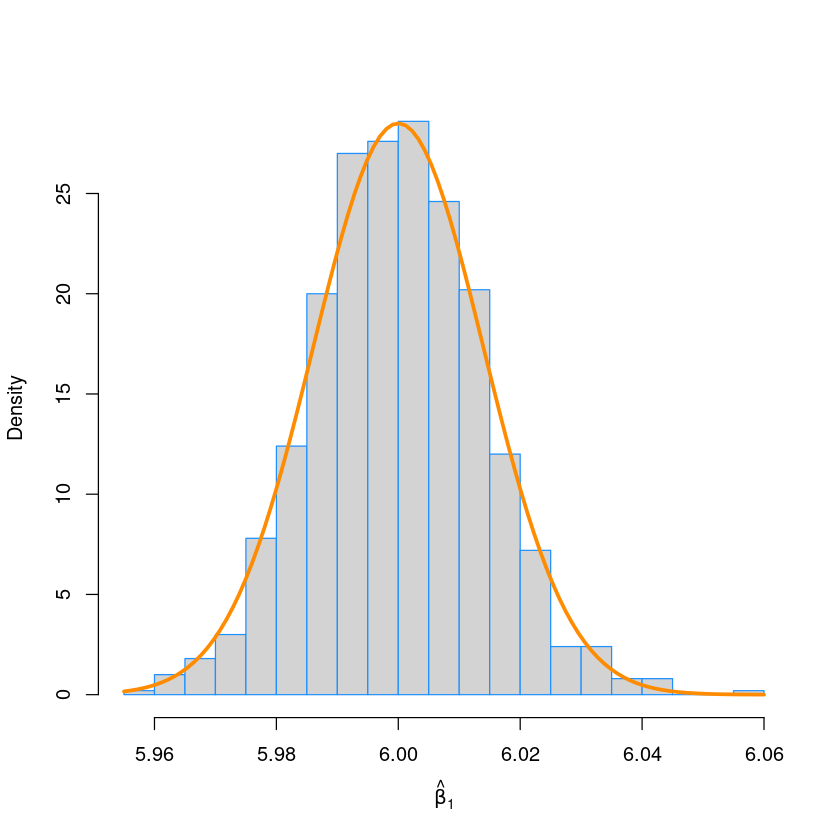

In [1]:
set.seed(10) # set the seed so we get the same results every time
sample_size = 100 # this is n
x = seq(1, 50, length = sample_size)	#fixed x values


####  fix our parameter values
beta_0 = 3
beta_1 = 6
sigma  = 2

#
###### Simulation
num_samples = 1000
beta_1_hats = rep(0, num_samples)

for (i in 1:num_samples) {
  eps = rnorm(sample_size, mean = 0, sd = sigma) # recall the error comes from a Normal distribution
  y   = beta_0 + beta_1 * x + eps
  
  sim_model = lm(y ~ x)
 
  beta_1_hats[i] = coef(sim_model)[2]
}


####  Sampling distributions 


### True Variance of beta_1
Sxx = sum((x - mean(x)) ^ 2)
var_beta_1_hat = sigma ^ 2 / Sxx	
var_beta_1_hat


#### Empirical Mean and Variance for Beta1

# ADD SOME COMMENT FOR PRINTING
print(paste("AVERAGE OF ALL SAMPLES:", mean(beta_1_hats))) 	# empirical mean
print(paste("VARIANCE OF ALL SAMPLES:", var(beta_1_hats))) 		# empirical variance


####### Empirical Distribution
# note need to use prob = TRUE
hist(beta_1_hats, prob = TRUE, breaks = 20, 
     xlab = expression(hat(beta)[1]), main = "", border = "dodgerblue")
curve(dnorm(x, mean = beta_1, sd = sqrt(var_beta_1_hat)), 
      col = "darkorange", add = TRUE, lwd = 3)

## Sampling Distribution of $\frac{b_1 - \beta_1}{s(b_1)}$

$$
\frac{b_1 - \beta_1}{\sigma(b_1)}\sim Z
$$

Additionally:

$$
\frac{b_1 - \beta_1}{s(b_1)}\sim t_{n-2}
$$

* $n-2$ degrees of freedom because there are two parameters that need to be estimated for the regression model ($\beta_0$ and $\beta_1$) so two degrees of freedom are lost here
* Now we have enough information to conduct our hypothesis test, which will be a **one-sample t-test**

## Test for $H_0$: $\beta_1 = 0$

* Null hypothesis $H_0$: $\beta_1 = 0$
* Alternative hypothesis $H_a$: $\beta_1 \ne 0$
* Test statistic is:

$$
T = \frac{b_1 - 0}{s(b_1)} = \frac{b_1}{\sqrt{\frac{MSE}{n-2}}}
$$

* Based on this interval, we can generate a p-value so determine whether the hypothesis is true or not

* **NOTE: THE ABOVE IS WRONG AND I NEED TO FIX/CHANGE THIS**

## Confidence Interval for $\beta_1$

* The confidence interval for $\beta_1$ is:
  
$$
b_1 \pm t_{1-\frac{\alpha}{2}, n-2} s(b_1)
$$

* In terms of hypothesis testing, if the CI does not contain 0, then we reject the null hypothesis and can conclude that there is a linear relationship

## Test for $H_0$: $\beta_0 = 0$

* Sampling distribution of $b_0 \sim N(\beta_0, \sigma^2(b_0))$
  * $\sigma^2(b_0) = \sigma^2\left[\frac{1}{n} + \frac{\overline X^2}{\sum(X_i - \overline X)^2}\right]$
  * Can estimate $\sigma^2(b_0)$ with $s^2(b_0) = MSE\left[\frac{1}{n} + \frac{\overline X^2}{\sum(X_i - \overline X)^2}\right]$ 
* Test statistic: $T = \frac{b_0 - 0}{s(b_0)}$ which is a t-distribution with $n-2$ degrees of freedom
* Can use critical value approach or p-value approach like before
* NOTE: If $X=0$ is not within the scope of the model, inference may be meaningless!

## Confidence Interval for the Mean Response

* Mean response when $X=X_h$ is $\hat Y_h = b_0 + b_1X_h$
* The formula for the CI is $\hat Y_h \pm t_{1-\alpha/2, n-2}s(\hat Y_h)$

## EXAMPLE: Skin Cancer Dataset

* load skin cancer dataset

In [2]:
# load the dataset
data = read.table('data_files/skin_cancer_data.txt', header=T)
x = data$Lat
y = data$Mort

* Fit a simple linear regression model with y = Mort and x = Lat

In [3]:
data_reg = lm(x ~ y)
summary(data_reg)


Call:
lm(formula = x ~ y)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5147 -1.8208  0.4187  1.5518  4.8265 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 56.91924    1.78072   31.96  < 2e-16 ***
y           -0.11373    0.01138   -9.99 3.31e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.637 on 47 degrees of freedom
Multiple R-squared:  0.6798,	Adjusted R-squared:  0.673 
F-statistic:  99.8 on 1 and 47 DF,  p-value: 3.309e-13


* Display a scatterplot of the data with the simple linear regression line

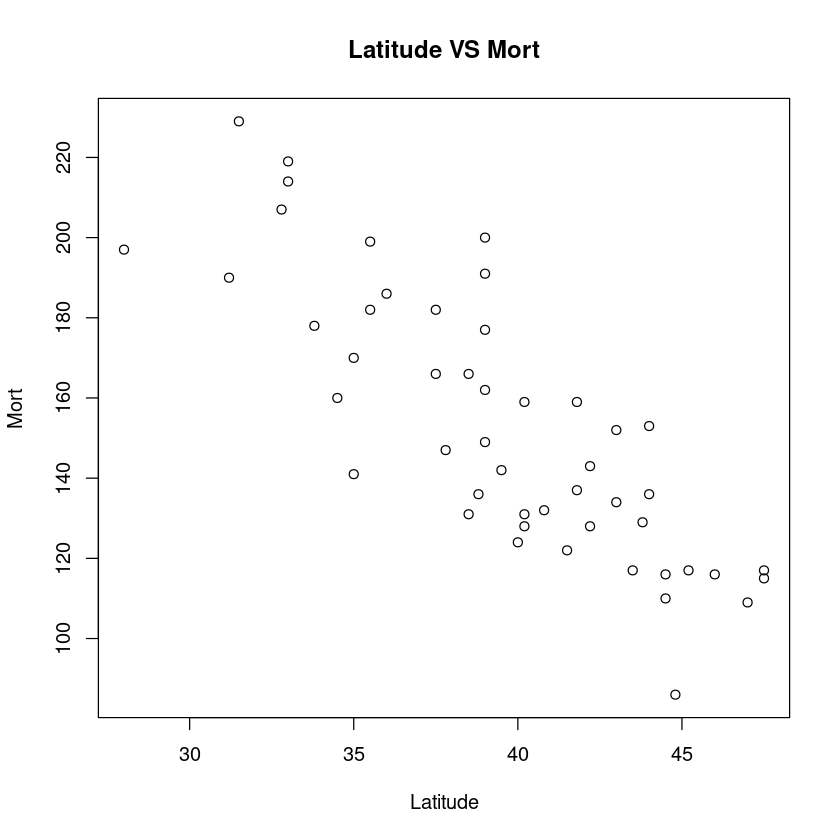

In [4]:
plot(x, y, xlab='Latitude', ylab='Mort', main='Latitude VS Mort')
abline(data_reg)

* Display a residual plot with fitted values on the horizontal axis

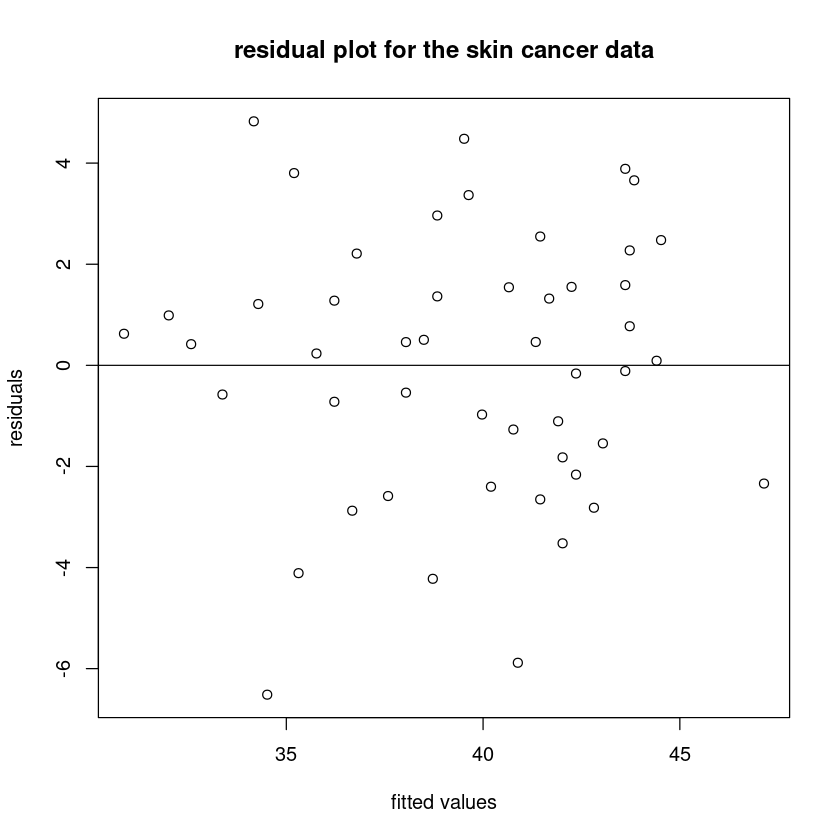

In [5]:
plot(x=fitted(data_reg), y=resid(data_reg), xlab='fitted values', ylab='residuals', main='residual plot for the skin cancer data')
abline(0,0)

* Check if there are any outliers

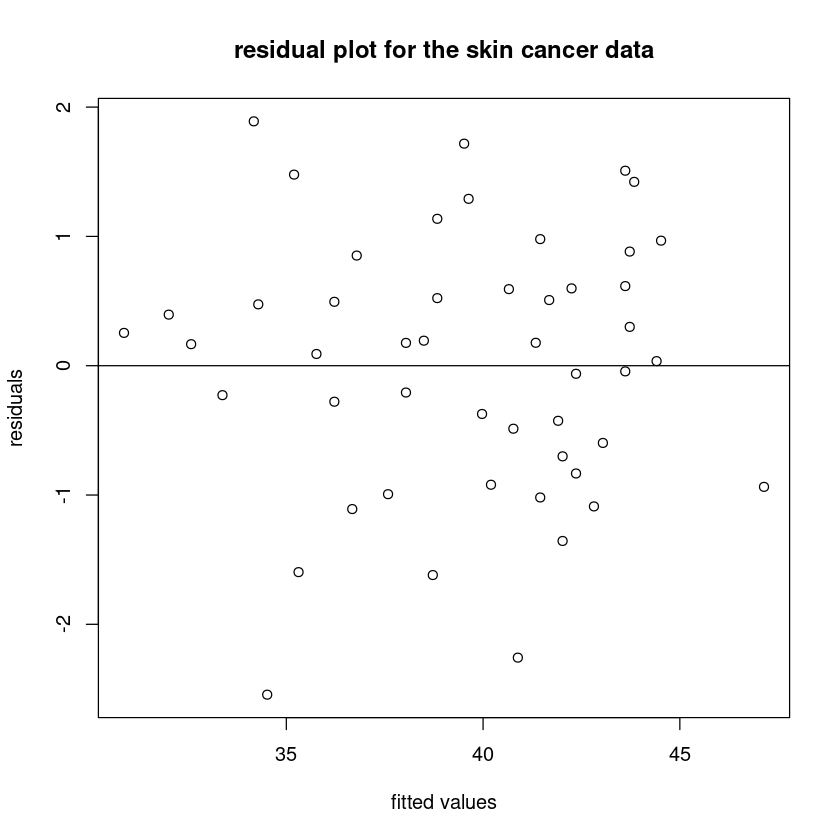

In [6]:
plot(x=fitted(data_reg), y=rstandard(data_reg), xlab='fitted values', ylab='residuals', main='residual plot for the skin cancer data')
abline(0,0)

* check normality of residual with a qqplot

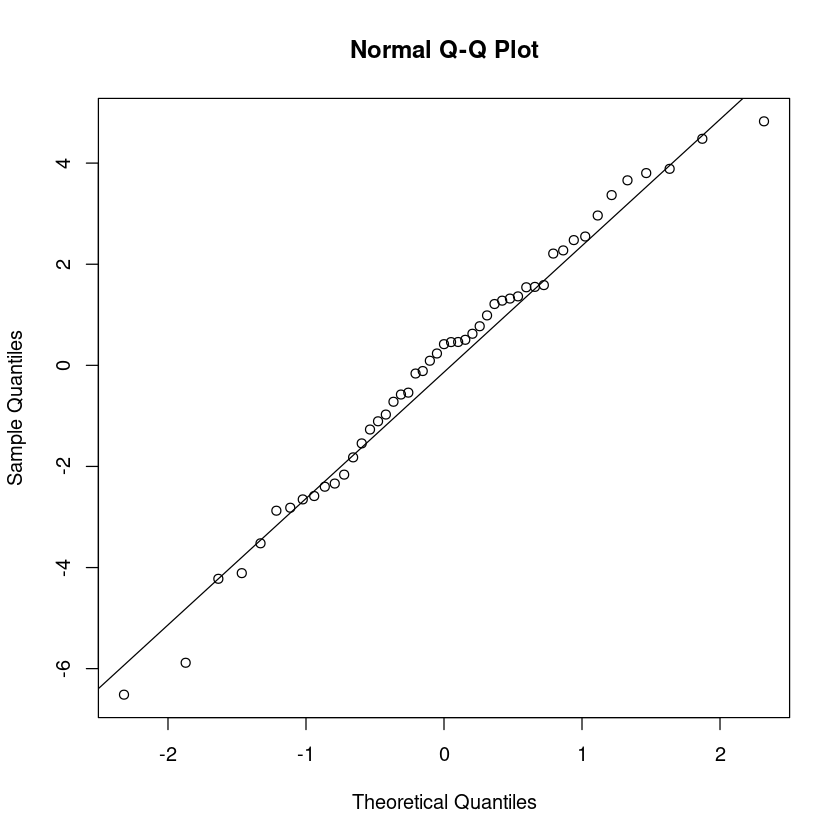

In [7]:
qqnorm(resid(data_reg))
qqline(resid(data_reg))

* Generate some tests for checking constant variance

In [8]:
library(car)
leveneTest(residuals(data_reg), group=factor(x<=median(x)), center=median)

Loading required package: carData



,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.028412,0.3157243
,47,NA,NA


In [9]:
library(ALSM)
bftest(data_reg, factor(x<=median(x)))

Loading required package: leaps

Loading required package: SuppDists



t.value,P.Value,alpha,df
1.014106,0.3157243,0.05,47


* Test for normality

In [10]:
shapiro.test(residuals(data_reg))


	Shapiro-Wilk normality test

data:  residuals(data_reg)
W = 0.98292, p-value = 0.6917


> If you have nonlinear features, you can simply substitute the feature for another variable (such as $X^2 = Y$) and then do all the same linear regression models and tests that we have learned up to this point. You can see this in `plasma_level.r`